In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [66]:
df = pd.read_csv("Coded_Segments.csv")
print(df.head())

               Dokumentname         Code  Anfang  Ende  \
0  reflection_assignment_P1      Level 1       1     1   
1  reflection_assignment_P1      Level 1       1     1   
2  reflection_assignment_P1      Level 1       1     1   
3  reflection_assignment_P1  Level 2 (a)       1     1   
4  reflection_assignment_P1  Level 2 (a)       1     1   

                                             Segment  
0  I am a newbie in data science (DS). On the one...  
1  However, the handling of data in basic cogniti...  
2  The HCDS course was largely aimed at a critica...  
3  Among these topics, some messages particularly...  
4  First of all, I became aware of the importance...  


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dokumentname  237 non-null    object
 1   Code          237 non-null    object
 2   Anfang        237 non-null    int64 
 3   Ende          237 non-null    int64 
 4   Segment       237 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.4+ KB


In [68]:
df['Code'].value_counts()

Code
Level 3        90
Level 1        69
Level 2 (b)    41
Level 2 (a)    31
Level 4         6
Name: count, dtype: int64

(array([69.,  0., 31.,  0.,  0., 41.,  0., 90.,  0.,  6.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

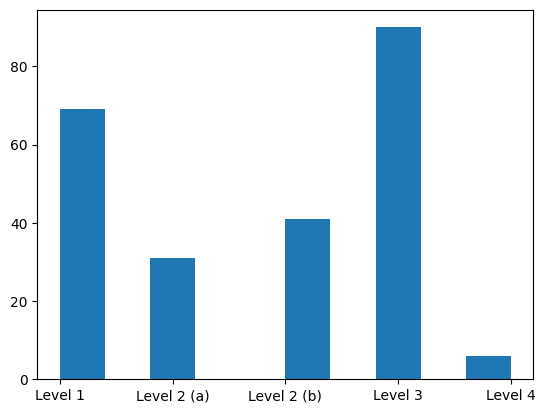

In [105]:
plt.hist(sorted(df['Code']))

In [70]:
df['Code'].value_counts().sort_index()

Code
Level 1        69
Level 2 (a)    31
Level 2 (b)    41
Level 3        90
Level 4         6
Name: count, dtype: int64

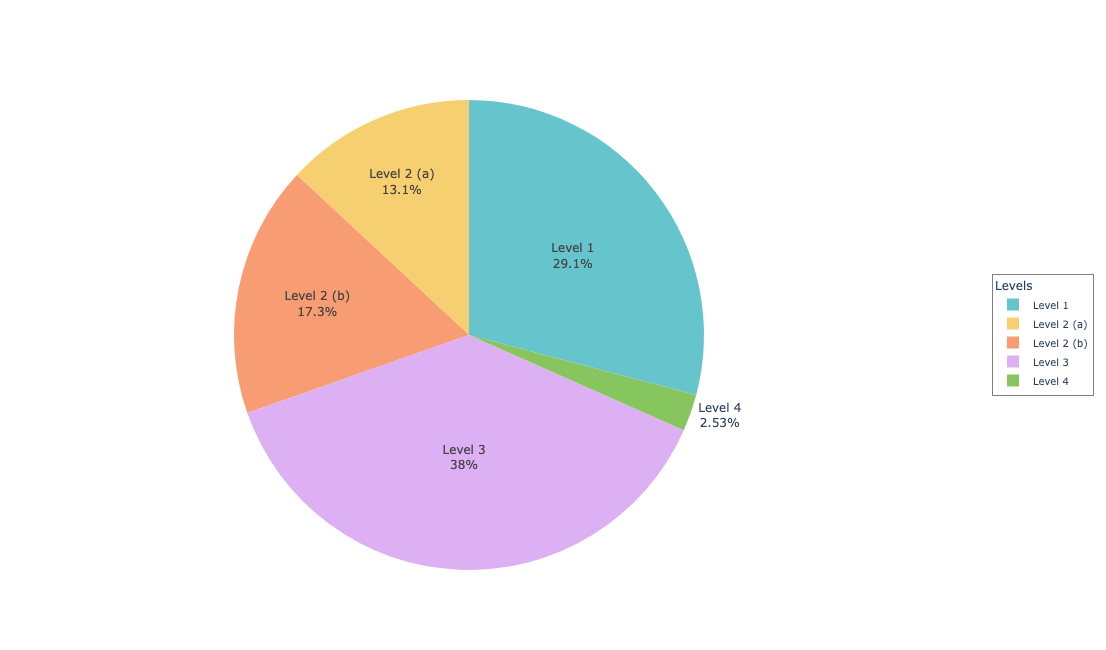

In [101]:
labels = sorted(df['Code'].unique())
values = df['Code'].value_counts().sort_index()

colors = px.colors.qualitative.Pastel

layout = go.Layout(
    autosize=False,
    width=650,
    height=650,
    legend_title_text='Levels',
    legend=dict(bordercolor="black",
                borderwidth=0.5,
                x=1.25,
                y=0.5,
                xanchor="left",
                yanchor="middle",
                font=dict(size=10),
                itemsizing='constant' 
            )
)

fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors), sort=False, textinfo='label+percent'
                            )], layout = layout)
fig.show()

In [26]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    le = LabelEncoder()
    df['class'] = le.fit_transform(df['Code'])

    # handle imbalanced dataset
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(df[['Segment']], df['class'])
    df_resampled = pd.DataFrame({'Segment': X_resampled['Segment'], 'class': y_resampled})

    print(f"Original dataset shape: {df.shape}")
    print(f"Resampled dataset shape: {df_resampled.shape}")

    return df_resampled, le

In [27]:
df_resampled, label_encoder = preprocess_data(df)
print(df_resampled)

Original dataset shape: (237, 6)
Resampled dataset shape: (450, 2)
                                               Segment  class
0    I am a newbie in data science (DS). On the one...      0
1    However, the handling of data in basic cogniti...      0
2    The HCDS course was largely aimed at a critica...      0
3    Among these topics, some messages particularly...      1
4    First of all, I became aware of the importance...      1
..                                                 ...    ...
445  The first concern, to begin  with, is to check...      4
446  The first concern, to begin  with, is to check...      4
447  Social nuances have shown how important it is ...      4
448  It also made me realise the high personal resp...      4
449  As an when my experience grew, I started to un...      4

[450 rows x 2 columns]


In [28]:
df_resampled['class'].value_counts()

class
0    90
1    90
4    90
2    90
3    90
Name: count, dtype: int64

(array([90.,  0., 90.,  0.,  0., 90.,  0., 90.,  0., 90.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

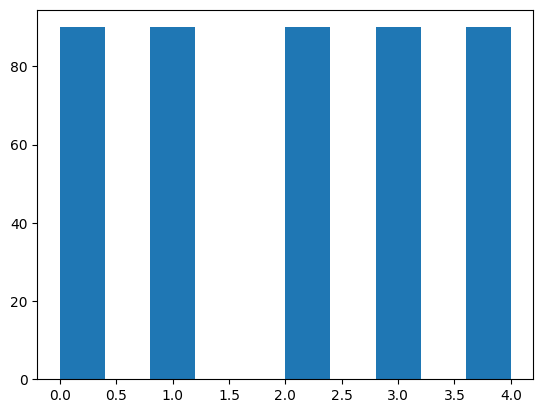

In [29]:
plt.hist(sorted(df_resampled['class']))